- 7, 8, 9, 10, 11 삭제: 벼 재배 기간
- 리까지 있는 데이터에  강수 데이터 for문 걸어서 붙이기 - 진영씨
- 최저기온, 최고기온, 평균, 강수량 조건문 걸어 속성 3개 만들기
- 라벨링 완료한 속성 3개 AND 비교해서 최종 라벨링 완료하기

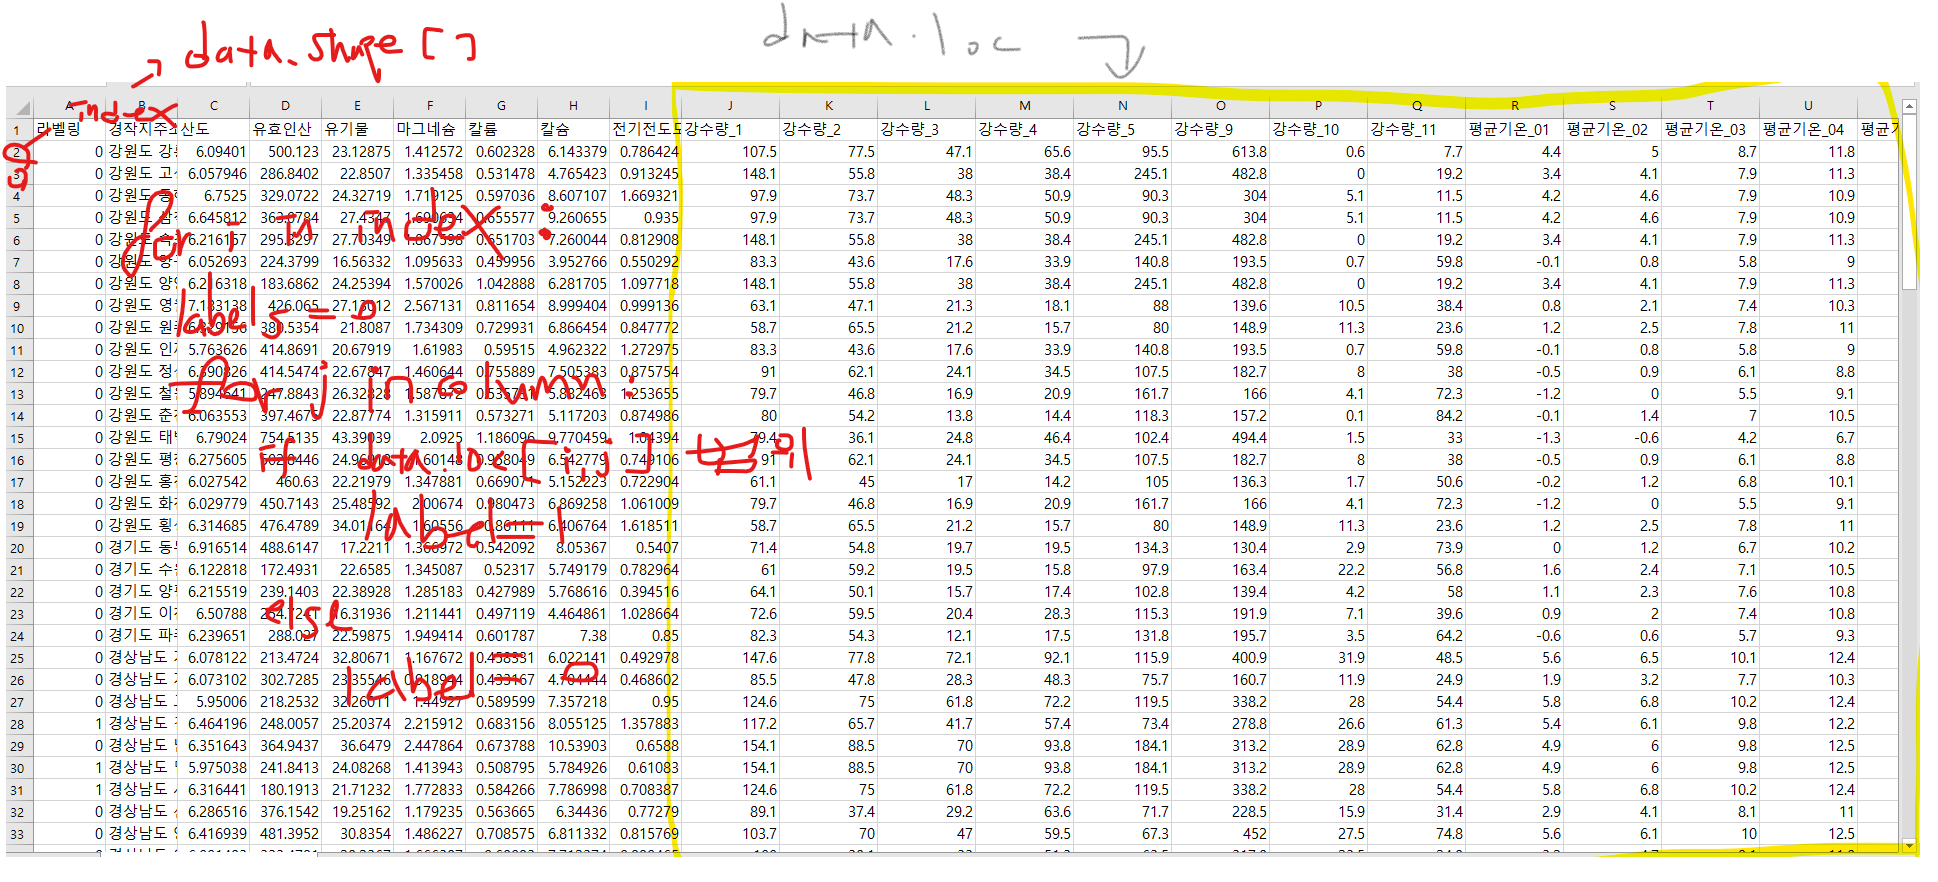

### 밀의 재배지 비 재배지 구분 계산 - 기온 & 강수

- 밀의 최저 생육온도는 3-4℃이고, 적온은 25℃, 최고온도는 30-32℃이다.
- 적온 15-20℃
- 생육 기간 15℃ 이상의 평균 기온만 보장되면 어디서나 재배할 수 있다.
- 강수량을 보면 밀 수량은 연간 강수량이 760mm 되는 지역에서 가장 높고 635~890mm 되는 지역이 그 다음이다.
- 이보다 강수량이 많거나 적은 지역은 수량이 낮은 지역이다.
- 가을 밀보리는 1월 평균 최저기온이 -15℃ 이상 되는 지역에도 배치가능

### 밀의 재배지 비 재배지 구분 계산 - 토양
- 산성토양에서는 잘 자라지 못함, 중성 및 약산성(pH6.0 - 7.5)이 좋다.
- 유기질, 인산, 알칼리 함량이 많은 곳이 좋다.

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [18]:
data_rain = pd.read_csv('송채영_전국토양평균데이터_수동.csv', encoding = 'euc-kr')
data_rain

,평균라벨,최저라벨,최고라벨,강수량라벨,경작지주소,산도,유효인산,유기물,마그네슘,칼륨,...,최저기온_10,최저기온_11,최고기온_1,최고기온_2,최고기온_3,최고기온_4,최고기온_5,최고기온_9,최고기온_10,최고기온_11
0,NaN,NaN,NaN,NaN,강원도 강릉시,6.094010,500.123000,23.128746,1.412572,0.602328,...,6.4,-0.1,12.5,16.7,21.7,26.8,32.5,29.7,26.6,25.5
1,NaN,NaN,NaN,NaN,강원도 고성군,6.057946,286.840200,22.850700,1.335458,0.531478,...,4.6,-2.1,11.2,16.1,19.3,24.5,32.4,28.7,23.7,23.1
2,NaN,NaN,NaN,NaN,강원도 동해시,6.752500,329.072200,24.327190,1.719125,0.597036,...,5.7,-1.3,11.4,15.4,19.4,25.3,30.9,28.2,23.5,23.2
3,NaN,NaN,NaN,NaN,강원도 삼척시,6.645812,363.078394,27.434697,1.690634,0.655577,...,5.7,-1.3,11.4,15.4,19.4,25.3,30.9,28.2,23.5,23.2
4,NaN,NaN,NaN,NaN,강원도 속초시,6.216157,295.329694,27.703493,1.867598,0.651703,...,4.6,-2.1,11.2,16.1,19.3,24.5,32.4,28.7,23.7,23.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,NaN,NaN,NaN,NaN,충청북도 음성군,6.444892,285.971793,17.334222,2.168944,0.585659,...,-0.9,-5.5,13.7,16.0,22.2,25.7,29.1,30.3,24.2,20.6
130,NaN,NaN,NaN,NaN,충청북도 제천시,6.440498,370.374342,23.039588,1.438561,0.554513,...,-3.0,-8.0,11.3,14.9,22.5,24.6,28.5,28.3,23.5,20.5
131,NaN,NaN,NaN,NaN,충청북도 증평군,6.214355,256.254644,19.181091,1.178538,0.370951,...,-0.9,-5.5,13.7,16.0,22.2,25.7,29.1,30.3,24.2,20.6
132,NaN,NaN,NaN,NaN,충청북도 진천군,6.298558,222.482427,25.262369,1.714248,0.532894,...,-0.9,-5.5,13.7,16.0,22.2,25.7,29.1,30.3,24.2,20.6


In [19]:
data_cut = data_rain.loc[:,'강수량_1':'강수량_11']
data_cut

,강수량_1,강수량_2,강수량_3,강수량_4,강수량_5,강수량_9,강수량_10,강수량_11
0,107.5,77.5,47.1,65.6,95.5,613.8,0.6,7.7
1,148.1,55.8,38.0,38.4,245.1,482.8,0.0,19.2
2,97.9,73.7,48.3,50.9,90.3,304.0,5.1,11.5
3,97.9,73.7,48.3,50.9,90.3,304.0,5.1,11.5
4,148.1,55.8,38.0,38.4,245.1,482.8,0.0,19.2
...,...,...,...,...,...,...,...,...
129,59.7,63.1,21.7,15.1,86.4,167.2,18.9,45.9
130,68.1,57.4,14.4,28.9,130.1,134.1,12.4,13.4
131,59.7,63.1,21.7,15.1,86.4,167.2,18.9,45.9
132,59.7,63.1,21.7,15.1,86.4,167.2,18.9,45.9


In [20]:
index_count = data_rain.shape[0]
index_count

134

In [21]:
colum_count = data_rain.shape[1]
colum_count

44

In [22]:
data_rain.shape

(134, 44)

In [23]:
index_count

134

In [24]:
data_rain.columns

Index(['평균라벨', '최저라벨', '최고라벨', '강수량라벨', '경작지주소', '산도', '유효인산', '유기물', '마그네슘',
       '칼륨', '칼슘', '전기전도도', '강수량_1', '강수량_2', '강수량_3', '강수량_4', '강수량_5',
       '강수량_9', '강수량_10', '강수량_11', '평균기온_01', '평균기온_02', '평균기온_03', '평균기온_04',
       '평균기온_05', '평균기온_09', '평균기온_10', '평균기온_11', '최저기온_1', '최저기온_2',
       '최저기온_3', '최저기온_4', '최저기온_5', '최저기온_9', '최저기온_10', '최저기온_11', '최고기온_1',
       '최고기온_2', '최고기온_3', '최고기온_4', '최고기온_5', '최고기온_9', '최고기온_10', '최고기온_11'],
      dtype='object')

# 무수한 테스트, 맨 아랫줄만 유효한 코드

In [25]:
for i in range(0, index_count):    
    labels = 0
    i += 1
    show_property = data_cut.iloc[i-1:i, : colum_count]
    print(show_property)

   강수량_1  강수량_2  강수량_3  강수량_4  강수량_5  강수량_9  강수량_10  강수량_11
0  107.5   77.5   47.1   65.6   95.5  613.8     0.6     7.7
   강수량_1  강수량_2  강수량_3  강수량_4  강수량_5  강수량_9  강수량_10  강수량_11
1  148.1   55.8   38.0   38.4  245.1  482.8     0.0    19.2
   강수량_1  강수량_2  강수량_3  강수량_4  강수량_5  강수량_9  강수량_10  강수량_11
2   97.9   73.7   48.3   50.9   90.3  304.0     5.1    11.5
   강수량_1  강수량_2  강수량_3  강수량_4  강수량_5  강수량_9  강수량_10  강수량_11
3   97.9   73.7   48.3   50.9   90.3  304.0     5.1    11.5
   강수량_1  강수량_2  강수량_3  강수량_4  강수량_5  강수량_9  강수량_10  강수량_11
4  148.1   55.8   38.0   38.4  245.1  482.8     0.0    19.2
   강수량_1  강수량_2  강수량_3  강수량_4  강수량_5  강수량_9  강수량_10  강수량_11
5   83.3   43.6   17.6   33.9  140.8  193.5     0.7    59.8
   강수량_1  강수량_2  강수량_3  강수량_4  강수량_5  강수량_9  강수량_10  강수량_11
6  148.1   55.8   38.0   38.4  245.1  482.8     0.0    19.2
   강수량_1  강수량_2  강수량_3  강수량_4  강수량_5  강수량_9  강수량_10  강수량_11
7   63.1   47.1   21.3   18.1   88.0  139.6    10.5    38.4
   강수량_1  강수량_2  강수량_3  강수량_4  강수량_5  강수

117   70.6   60.5   16.8   20.3   98.7  171.0     4.1    47.6
     강수량_1  강수량_2  강수량_3  강수량_4  강수량_5  강수량_9  강수량_10  강수량_11
118   46.0   72.3   23.0   20.7  101.3  257.7    12.6    72.0
     강수량_1  강수량_2  강수량_3  강수량_4  강수량_5  강수량_9  강수량_10  강수량_11
119   46.0   72.3   23.0   20.7  101.3  257.7    12.6    72.0
     강수량_1  강수량_2  강수량_3  강수량_4  강수량_5  강수량_9  강수량_10  강수량_11
120   59.7   63.1   21.7   15.1   86.4  167.2    18.9    45.9
     강수량_1  강수량_2  강수량_3  강수량_4  강수량_5  강수량_9  강수량_10  강수량_11
121   79.6   92.4   19.3   17.7  108.5  208.9     4.4    41.8
     강수량_1  강수량_2  강수량_3  강수량_4  강수량_5  강수량_9  강수량_10  강수량_11
122   46.0   72.3   23.0   20.7  101.3  257.7    12.6    72.0
     강수량_1  강수량_2  강수량_3  강수량_4  강수량_5  강수량_9  강수량_10  강수량_11
123   73.0   85.2   26.6   13.8   91.3  251.2    19.5    41.7
     강수량_1  강수량_2  강수량_3  강수량_4  강수량_5  강수량_9  강수량_10  강수량_11
124   59.7   63.1   21.7   15.1   86.4  167.2    18.9    45.9
     강수량_1  강수량_2  강수량_3  강수량_4  강수량_5  강수량_9  강수량_10  강수량_11
125   68

In [26]:
# 1차 완성
# 조건문 붙이기

for i in range(0, index_count):    
    labels = 0
    i += 1
    show_property = (data_cut.iloc[i-1:i, : colum_count]).sum(axis = 1)
    print(show_property)

0    1015.3
dtype: float64
1    1027.4
dtype: float64
2    681.7
dtype: float64
3    681.7
dtype: float64
4    1027.4
dtype: float64
5    573.2
dtype: float64
6    1027.4
dtype: float64
7    426.1
dtype: float64
8    424.9
dtype: float64
9    573.2
dtype: float64
10    547.9
dtype: float64
11    568.4
dtype: float64
12    522.2
dtype: float64
13    818.0
dtype: float64
14    547.9
dtype: float64
15    430.9
dtype: float64
16    568.4
dtype: float64
17    424.9
dtype: float64
18    506.9
dtype: float64
19    495.8
dtype: float64
20    451.7
dtype: float64
21    534.7
dtype: float64
22    561.4
dtype: float64
23    986.8
dtype: float64
24    483.1
dtype: float64
25    873.7
dtype: float64
26    722.1
dtype: float64
27    995.4
dtype: float64
28    995.4
dtype: float64
29    873.7
dtype: float64
30    566.8
dtype: float64
31    901.8
dtype: float64
32    652.0
dtype: float64
33    625.1
dtype: float64
34    995.4
dtype: float64
35    670.4
dtype: float64
36    873.7
dtype: float64
37    6

In [27]:
# 테스트 용, 사용하지 않음

data_cut_column = data_cut.columns

In [28]:
# 테스트 용, 사용하지 않음
column_list = []
for i in data_cut_column:
    column_list.append(i)

In [29]:
# 테스트 용, 사용하지 않음

column_list

['강수량_1', '강수량_2', '강수량_3', '강수량_4', '강수량_5', '강수량_9', '강수량_10', '강수량_11']

In [30]:
# 테스트 용, 사용하지 않음

for i in range(0, index_count): 
    labels = 0
    print('-'*60)
    
    for j in column_list:
        show_property = (data_cut.loc[i, j])
        print(show_property)

------------------------------------------------------------
107.5
77.5
47.1
65.6
95.5
613.8
0.6
7.7
------------------------------------------------------------
148.1
55.8
38.0
38.4
245.1
482.8
0.0
19.2
------------------------------------------------------------
97.9
73.7
48.3
50.9
90.3
304.0
5.1
11.5
------------------------------------------------------------
97.9
73.7
48.3
50.9
90.3
304.0
5.1
11.5
------------------------------------------------------------
148.1
55.8
38.0
38.4
245.1
482.8
0.0
19.2
------------------------------------------------------------
83.3
43.6
17.6
33.9
140.8
193.5
0.7
59.8
------------------------------------------------------------
148.1
55.8
38.0
38.4
245.1
482.8
0.0
19.2
------------------------------------------------------------
63.1
47.1
21.3
18.1
88.0
139.6
10.5
38.4
------------------------------------------------------------
58.7
65.5
21.2
15.7
80.0
148.9
11.3
23.6
------------------------------------------------------------
83.3
43.6
17.6
33.9
1

In [31]:
# 테스트 용, 사용하지 않음

for i in range(0, index_count): 
    labels = 0
    print('-'*60)
    
    for j in column_list:
        show_property = (data_cut.loc[i, j])
        print(show_property)

------------------------------------------------------------
107.5
77.5
47.1
65.6
95.5
613.8
0.6
7.7
------------------------------------------------------------
148.1
55.8
38.0
38.4
245.1
482.8
0.0
19.2
------------------------------------------------------------
97.9
73.7
48.3
50.9
90.3
304.0
5.1
11.5
------------------------------------------------------------
97.9
73.7
48.3
50.9
90.3
304.0
5.1
11.5
------------------------------------------------------------
148.1
55.8
38.0
38.4
245.1
482.8
0.0
19.2
------------------------------------------------------------
83.3
43.6
17.6
33.9
140.8
193.5
0.7
59.8
------------------------------------------------------------
148.1
55.8
38.0
38.4
245.1
482.8
0.0
19.2
------------------------------------------------------------
63.1
47.1
21.3
18.1
88.0
139.6
10.5
38.4
------------------------------------------------------------
58.7
65.5
21.2
15.7
80.0
148.9
11.3
23.6
------------------------------------------------------------
83.3
43.6
17.6
33.9
1

70.6
60.5
16.8
20.3
98.7
171.0
4.1
47.6
------------------------------------------------------------
70.6
60.5
16.8
20.3
98.7
171.0
4.1
47.6
------------------------------------------------------------
73.9
59.6
45.3
40.5
77.7
158.0
7.6
71.0
------------------------------------------------------------
108.6
65.3
43.2
45.7
81.4
268.2
8.5
73.4
------------------------------------------------------------
76.8
65.9
25.4
23.0
79.0
135.2
4.2
58.5
------------------------------------------------------------
73.3
58.1
39.1
34.5
86.1
211.4
5.9
69.8
------------------------------------------------------------
76.8
65.9
25.4
23.0
79.0
135.2
4.2
58.5
------------------------------------------------------------
110.1
95.5
132.2
81.8
244.0
424.9
39.2
11.7
------------------------------------------------------------
116.7
29.8
81.6
82.3
20.6
400.5
53.7
28.2
------------------------------------------------------------
78.5
91.2
24.4
17.8
80.4
173.6
3.2
41.8
--------------------------------------------

In [32]:
# 맨 아랫줄 코드, 유효 코드
# 1차 완성
# 조건문 붙이기
# 합계만 뽑아냄
# 최종완성

add_list = []

for i in range(0, index_count):    
    i += 1
    show_property = (data_cut.iloc[i-1:i, : colum_count]).sum(axis = 1)
    show_property = int(show_property)
    
    
    if 635 <= show_property <= 890:
        add_list.append(1)
        
    else:
        add_list.append(0)
        
    
data_rain['강수량라벨'] = add_list
data_rain

data_rain.to_csv('찐_완료_라벨링_강수량.csv', index = False, encoding = 'euc-kr')
